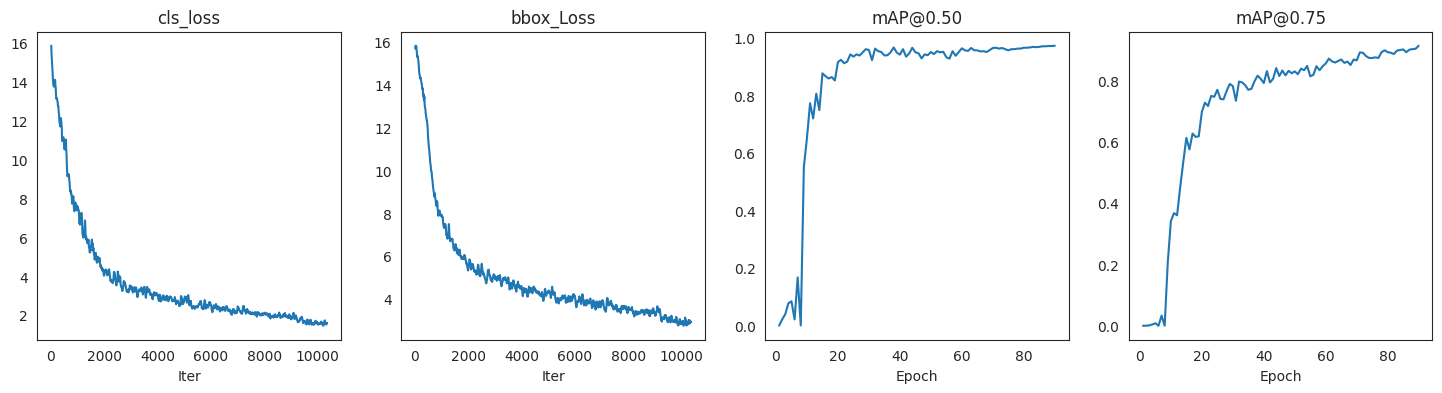

In [7]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Function to parse the JSON data and split into loss and mAP dataframes
def parse_data(data):
    loss_data = []
    map_data = []

    for item in data:
        loss_item = {key: item[key] for key in item if 'loss' in key or key == 'iter'}
        map_item = {key: item[key] for key in item if 'coco/bbox_mAP' in key or key == 'step'}
        loss_data.append(loss_item)
        map_data.append(map_item)

    return pd.DataFrame(loss_data), pd.DataFrame(map_data)

# Load the JSON data from the file
with open('/workspace/objectdet/work_dirs/yolov8_s_syncbn_fast_8xb16-50e_boxes/1/20240316_102329/vis_data/20240316_102329.json', 'r') as f:
    data = [json.loads(line) for line in f]

# Parse data into separate DataFrames
df_loss, df_map = parse_data(data)

df_loss = df_loss.dropna()
df_map = df_map.dropna() 

# Set up the figure and axes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 4))

# Plot losses
# sns.lineplot(data=df_loss, x='iter', y='loss', ax=ax1, label='Total Loss')
# ax1.set_xlabel('Iter')
# ax1.set_ylabel('Loss')
# ax1.set_title('Total Loss')
sns.lineplot(data=df_loss, x='iter', y='loss_cls', ax=ax1,)
ax1.set_xlabel('Iter')
ax1.set_ylabel(None)
ax1.set_title('cls_loss')
sns.lineplot(data=df_loss, x='iter', y='loss_bbox', ax=ax2, )
ax2.set_xlabel('Iter')
ax2.set_ylabel(None)
ax2.set_title('bbox_Loss')
# sns.lineplot(data=df_loss, x='iter', y='loss_rpn_bbox', ax=ax1, label='rpn bbox Loss')
# sns.lineplot(data=df_loss, x='iter', y='loss_rpn_cls', ax=ax1, label='rpn Classification Loss')
# ax1.set_xlabel('Iter')
# ax1.set_ylabel('Loss')
# # ax1.set_xlim(0, 1)
# # ax1.set_ylim(0, 1)
# ax1.set_title('Losses over Steps')

# Plot mAPs
# sns.lineplot(data=df_map, x='step', y='coco/bbox_mAP', ax=ax3,)
# ax3.set_xlabel('Epoch')
# ax3.set_ylabel('mAP')
# ax3.set_title('Overall mAP')
sns.lineplot(data=df_map, x='step', y='coco/bbox_mAP_50', ax=ax3,)
ax3.set_xlabel('Epoch')
ax3.set_ylabel(None)
ax3.set_title('mAP@0.50')
sns.lineplot(data=df_map, x='step', y='coco/bbox_mAP_75', ax=ax4,)
ax4.set_xlabel('Epoch')
ax4.set_ylabel(None)
ax4.set_title('mAP@0.75')
sns.set_style("white")


# Add legends and adjust layout
# ax1.legend()
# ax2.legend()
# ax3.legend()
# ax4.legend()
# ax5.legend()
# plt.tight_layout()

# os.makedirs("records/detr/1", exist_ok=True)

# Save the plot
plot_filename = 'training_progress.png'
# plt.savefig(os.path.join("records/detr/1", plot_filename))
plt.show()


In [8]:
#Save the dataframes to csv
df_loss.to_csv('records/yolov5_n-v61_syncbn_fast_1xb8-40e_cardboard/1/loss.csv', index=False)
df_map.to_csv('records/yolov5_n-v61_syncbn_fast_1xb8-40e_cardboard/1/mAP.csv', index=False)